# problem statement

What are properties to be consider before buying a house

1. Location
2. Room numbers
3. Distance from landmark
4. House age
6. Distance from graveyard


## Linear Regression

- It is a regression model which tries to predict the relationship between the dependent variable Y and independent variable X in a linear fashion.
- y = mx+c equation.


In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
# load dataset

data = pd.read_excel("d:/Analytics/insurance.xlsx")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


In [6]:
data.shape

(1338, 7)

In [7]:
data.info

<bound method DataFrame.info of        age     sex   bmi  children smoker     region  expenses
0     19.0  female  27.9       0.0    yes  southwest  16884.92
1     18.0    male  33.8       1.0     no  southeast   1725.55
2     28.0    male  33.0       3.0     no  southeast   4449.46
3     33.0    male  22.7       0.0     no  northwest  21984.47
4     32.0    male  28.9       0.0     no  northwest   3866.86
...    ...     ...   ...       ...    ...        ...       ...
1333  50.0    male  31.0       3.0     no  northwest  10600.55
1334  18.0  female  31.9       0.0     no  northeast   2205.98
1335  18.0  female  36.9       0.0     no  southeast   1629.83
1336  21.0  female  25.8       0.0     no  southwest   2007.95
1337  61.0  female  29.1       0.0    yes  northwest  29141.36

[1338 rows x 7 columns]>

<AxesSubplot:>

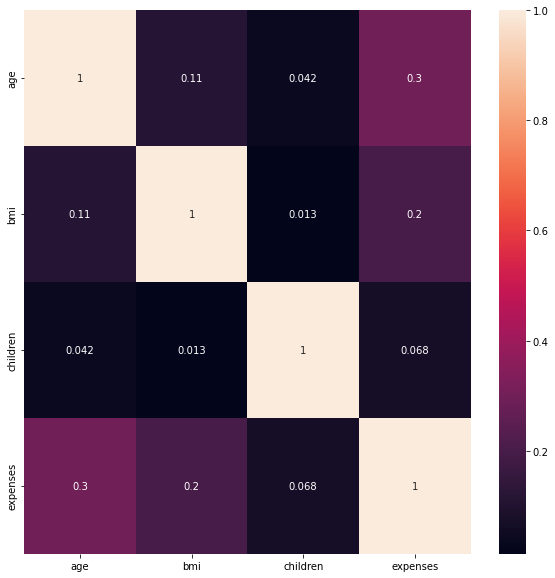

In [10]:
# check the feature correlations

fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True, ax=ax)

In [12]:
#label encode object types
# find the string columns

d_types = dict(data.dtypes)
for name, type in d_types.items():
    if str(type) == 'object':
        print(f"<----------{name}-------------->")
        print(data[name].value_counts())
        print()

<----------sex-------------->
male      676
female    662
Name: sex, dtype: int64

<----------smoker-------------->
no     1064
yes     274
Name: smoker, dtype: int64

<----------region-------------->
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [14]:
# Change the label to encoded values

for name, type, in d_types.items():
    if str(type)=='object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [15]:
# check the dataset once for seeing the impact

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 57.6 KB


In [17]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

In [18]:
x.shape , y.shape

((1338, 6), (1338,))

In [19]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest= train_test_split(x,y,test_size=0.2,random_state=4)

In [20]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [22]:
Xtrain.shape , Xtest.shape

((1070, 6), (268, 6))

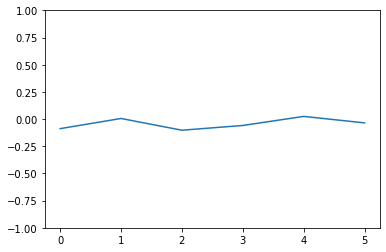

In [24]:
# check if the data is standardized or not
# mean should be 1
plt.ylim(-1,1)

means=[]

for i in range(x.shape[1]):
    means.append(np.mean(Xtest[:,i]))

plt.plot(means, scaley=False)

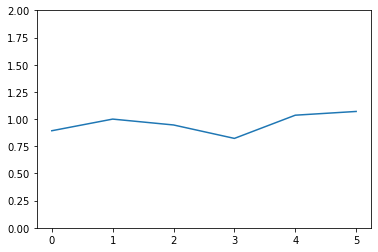

In [25]:
#check variance
plt.ylim(0,2)

vars=[]
for i in range(x.shape[1]):
    vars.append(np.var(Xtest[:,i]))

plt.plot(vars)

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [29]:
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [33]:
model.intercept_

13479.206925233628

In [34]:
# y= mx+c
model.coef_.dot(Xtest[10,:])+model.intercept_

3610.2356296356247

# Recursive Feature Elimination and Cross Validation

It eliminate unimportant features in a recursive manner
- Model : the ML algorithm on which we want to train
- Step : determine how many features we want to eliminate in one iteration, step of 1 is good choice
- Min_features_to_select: as RFECV is recursively iterating we need to stop it forcefully.

In [39]:
# import the library

from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()

values= dict(data["region"].value_counts())

for e,(val, _) in enumerate(values.items()):
    data["region_" + str(val)]=part[:,e]

data=data.drop(["region"], axis= 1)
data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19.0,0,27.9,0.0,1,16884.92,0.0,0.0,0.0,1.0
1,18.0,1,33.8,1.0,0,1725.55,0.0,0.0,1.0,0.0
2,28.0,1,33.0,3.0,0,4449.46,0.0,0.0,1.0,0.0
3,33.0,1,22.7,0.0,0,21984.47,0.0,1.0,0.0,0.0
4,32.0,1,28.9,0.0,0,3866.86,0.0,1.0,0.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain= Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)

In [41]:
Xtrain.shape , Xtest.shape

((1070, 6), (268, 6))

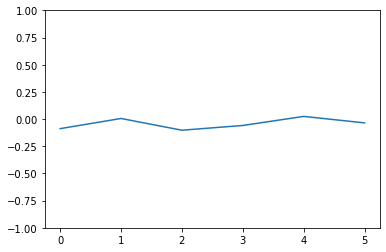

In [43]:
#check if data is standized or not
plt.ylim(-1,1)

means=[]

for i in range(x.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

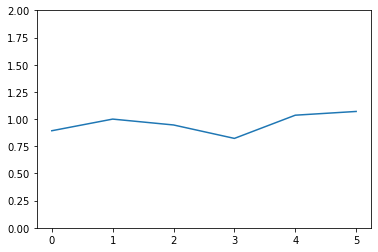

In [45]:
#check variance

plt.ylim(0,2)

vars=[]

for i in range(x.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()

rfecv = RFECV(model, step=1, min_features_to_select=4, n_jobs=-1)
rfecv.fit(Xtrain,Ytrain)

RFECV(estimator=LinearRegression(), min_features_to_select=4, n_jobs=-1)

In [48]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True])

In [49]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1])

In [50]:
selected_features = np.where(rfecv.support_)[0]
Xtrain= Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [51]:
model.fit(Xtrain,Ytrain)

LinearRegression()

In [52]:
model.intercept_

13479.206925233648

In [54]:
model.coef_.dot(Xtest[10,:])+ model.intercept_

3610.2356296356247

In [55]:
model.predict(Xtest[10,:].reshape(1,-1))

array([3610.23562964])

In [56]:
model.score(Xtest.Ytest)

AttributeError: 'numpy.ndarray' object has no attribute 'Ytest'